## Split Data

Splitting data to `70%` training set, `15%` validation set, `15%` test set to `train_set`, `val_set`, `test_set` respectively

### Prepare env

In [117]:
import os
import shutil
from PIL import Image
import random
import torch

## Set up folders
def ensure_folder(folder_name):
    try:
        os.makedirs(folder_name)
    except FileExistsError:
        pass

root_dir = os.getcwd() + '/data_processing/'
# Don't write anything into data
data_dir = root_dir + 'data/'
train_set = root_dir + 'train_set/'
val_set = root_dir + 'val_set/'
test_set = root_dir + 'test_set/'

# Create folders
ensure_folder(train_set)
ensure_folder(val_set)
ensure_folder(test_set)

train_labels_file = root_dir + 'train_labels.pt'
val_labels_file = root_dir + 'val_labels.pt'
test_labels_file = root_dir + 'test_labels.pt'

### Do split

In [118]:

# Load original labels
labels = torch.load(root_dir + 'labels.pt')
data_size = len(labels)
print("Find data count: %s, Ready to split "% data_size)

# Start to split data
val_size = int(data_size * 0.15)
test_size = int(data_size * 0.15)
train_size = data_size - val_size - test_size
print("Val size:",val_size, ", Test size:", test_size, ", train size:", (data_size - val_size - test_size))


data = torch.utils.data.random_split(torch.arange(data_size, dtype=torch.long), [val_size, test_size, train_size])

# Validation set
def split_data(labels, inc, target_folder, target_label_file):
    inc_labels = []
    for i in range(0, len(data[inc])):
        # Save labels
        index = data[inc][i]
        # Mapping
        inc_labels.append(labels[index])
        filename = str(i)
        shutil.copyfile(data_dir + str(index.item()) + '.jpg', target_folder + filename + '.jpg')
    torch.save(torch.tensor(inc_labels), target_label_file)
    print("spliting %s done"%inc)

split_data(labels, 0, val_set, val_labels_file)
split_data(labels, 1, test_set, test_labels_file)
split_data(labels, 2, train_set, train_labels_file)

Find data count: 1848, Ready to split 
Val size: 277 , Test size: 277 , train size: 1294
spliting 0 done
spliting 1 done
spliting 2 done


### !!! Delete splited folders

In [114]:
# Remove label files
def remove_labels(file):
    if os.path.exists(file):   
        os.remove(file)
    else:
        print("not exists: ", file)

remove_labels(val_labels_file)
remove_labels(test_labels_file)
remove_labels(train_labels_file)

# Remove splited files
shutil.rmtree(train_set)
shutil.rmtree(val_set)
shutil.rmtree(test_set)


not exists:  /home/marshall/Desktop/study/CS5242/CS5242_face_with_mask_detection/data_processing/val_labels.pt
not exists:  /home/marshall/Desktop/study/CS5242/CS5242_face_with_mask_detection/data_processing/test_labels.pt
not exists:  /home/marshall/Desktop/study/CS5242/CS5242_face_with_mask_detection/data_processing/train_labels.pt


### Check splited labels and data

index: 271  label: 1


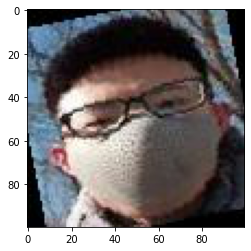

In [127]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_labels = torch.load(train_labels_file)
train_size = len(train_labels)

rand = random.randint(0, train_size)
print("index:", rand, " label:", labels[rand].item())
img = mpimg.imread(train_set + str(rand) + '.jpg')
imgplot = plt.imshow(img)
plt.show()